In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('../Data/Data.csv')
label=pd.read_csv('../Data/Label.csv')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, label['Label'], test_size=0.2, random_state=42)

In [5]:
lda_optimal = LinearDiscriminantAnalysis(n_components=5)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:


X_train_lda = lda_optimal.fit_transform(X_train_scaled, y_train)
X_test_lda = lda_optimal.transform(X_test_scaled)

In [8]:
print(f"Transformed training shape: {X_train_lda.shape}")
print(f"Transformed test shape: {X_test_lda.shape}")

Transformed training shape: (358332, 5)
Transformed test shape: (89583, 5)


In [11]:
# Initialize Random Forest
rf_classifier = RandomForestClassifier(random_state=42,n_estimators=150)

# Train the model using LDA-transformed data
rf_classifier.fit(X_train_lda, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test_lda)

Random Forest Accuracy: 0.9244

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     71701
           1       0.34      0.22      0.27        68
           2       0.65      0.25      0.36       104
           3       0.49      0.23      0.31       916
           4       0.71      0.77      0.74      6259
           5       0.63      0.75      0.68      5849
           6       0.75      0.61      0.67       867
           7       0.71      0.68      0.69      3392
           8       0.39      0.25      0.30       381
           9       0.27      0.09      0.13        46

    accuracy                           0.92     89583
   macro avg       0.59      0.48      0.51     89583
weighted avg       0.93      0.92      0.92     89583



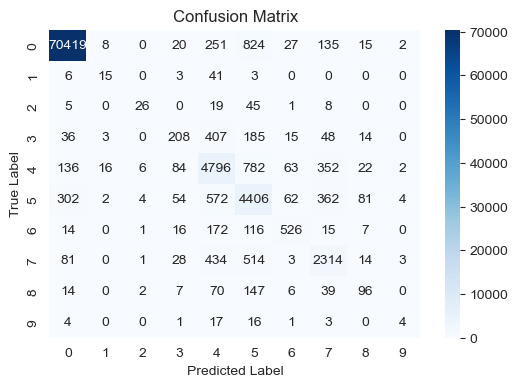

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
